In [164]:
import pandas as pd

# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split;

from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D;
from tensorflow.keras import utils;
from tensorflow.keras.applications.vgg16 import VGG16;
from tensorflow.keras.optimizers import RMSprop;

In [215]:
df = pd.read_pickle('3_datasets_2018_10_22_no_aug')

In [261]:
len(df)

2033

In [216]:
df['has_cnt'].mean() # percentage of the data that contains a valid CNT measurment location

0.42493887530562346

In [217]:
# there are some images that didn't load in with the right shape
# let's filter them out

# check the shape of each 'img' entry then filter
is_shaped = [df.iloc[i,1].shape == img_shape for i in range(len(df))]

df = df[is_shaped]

In [218]:
# keras wants a row for each class, so we need a `not_cnt` row
df['no_cnt'] = [int(not(i)) for i in df['has_cnt']]

In [219]:
df.head(10)

,name,img,diameter,has_cnt,no_cnt
0,193_'0.jpg-1-0,"[[196, 92, 149, 73, 78, 159, 77, 157, 84, 149,...",48.259714,1,0
1,193_'0.jpg-2-0,"[[116, 161, 122, 176, 149, 203, 183, 141, 100,...",21.213203,1,0
2,193_'0.jpg-3-0,"[[137, 97, 87, 79, 166, 108, 124, 164, 168, 93...",59.816386,1,0
3,193_'0.jpg-4-0,"[[63, 99, 163, 177, 175, 156, 146, 143, 119, 9...",20.248457,1,0
4,193_'0.jpg-5-0,"[[158, 144, 212, 136, 150, 153, 150, 148, 216,...",29.546573,1,0
5,193_'0.jpg-6-0,"[[186, 168, 119, 148, 168, 182, 125, 152, 149,...",14.317821,1,0
6,193_'0.jpg_neg-0,"[[69, 85, 74, 43, 104, 83, 118, 164, 145, 81, ...",0.000000,0,1
7,193_'0.jpg_neg-1,"[[136, 85, 131, 104, 82, 52, 177, 172, 180, 10...",0.000000,0,1
8,193_'0.jpg_neg-2,"[[137, 168, 190, 118, 125, 41, 147, 54, 67, 10...",0.000000,0,1
9,193_'0.jpg_neg-3,"[[172, 216, 172, 167, 206, 124, 161, 122, 158,...",0.000000,0,1


In [220]:
X = df['img']
y = df[['has_cnt','no_cnt']]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Keras wants one giant array, rather than a list of arrays
X_train = np.concatenate([*X_train]).reshape(len(X_train),128,128,1)
X_test = np.concatenate([*X_test]).reshape(len(X_test),128,128,1)

In [259]:
cnn_model = Sequential()

cnn_model.add(MaxPooling2D(pool_size=(2, 2),
                          input_shape=(128, 128, 1)))

cnn_model.add(Conv2D(filters=12,            # number of filters
                     kernel_size=(3, 3),        # height/width of filter
                     activation='relu'))     # activation function

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

# Add a final layer with 10 neurons.
cnn_model.add(Dense(2, activation='softmax'))

# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [260]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=512,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Train on 1626 samples, validate on 407 samples
Epoch 1/10
1626/1626 [==============================] - 6s 4ms/sample - loss: 154.1678 - acc: 0.5301 - val_loss: 68.2612 - val_acc: 0.5602
Epoch 2/10
1626/1626 [==============================] - 7s 4ms/sample - loss: 43.9410 - acc: 0.5074 - val_loss: 63.7096 - val_acc: 0.4398
Epoch 3/10
1626/1626 [==============================] - 8s 5ms/sample - loss: 52.8555 - acc: 0.4170 - val_loss: 7.9918 - val_acc: 0.4398
Epoch 4/10
1626/1626 [==============================] - 7s 4ms/sample - loss: 10.6574 - acc: 0.5166 - val_loss: 21.9877 - val_acc: 0.5602
Epoch 5/10
1626/1626 [==============================] - 6s 4ms/sample - loss: 20.2050 - acc: 0.5830 - val_loss: 14.7052 - val_acc: 0.5602
Epoch 6/10
1626/1626 [==============================] - 7s 4ms/sample - loss: 9.5197 - acc: 0.5830 - val_loss: 2.9490 - val_acc: 0.4373
Epoch 7/10
1626/1626 [==============================] - 7s 4ms/sample - loss: 4.6801 - acc: 0.4170 - val_loss: 1.0646 - val_acc

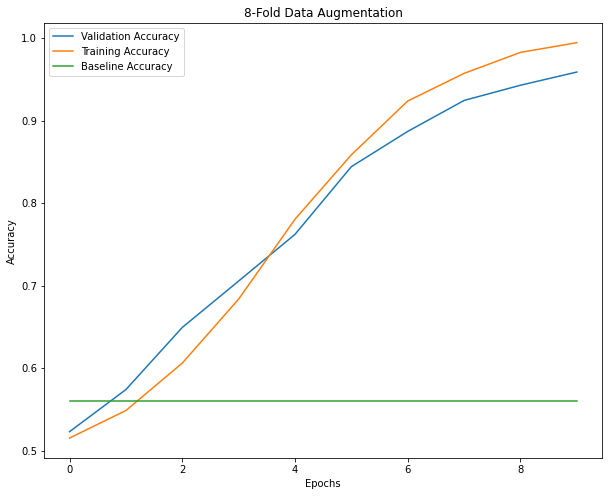

In [255]:
plt.figure(figsize = (10,8))
plt.plot(history.history['val_acc'],label = "Validation Accuracy")
plt.plot(history.history['acc'],label = "Training Accuracy")
plt.plot(np.arange(len(history.history['acc'])),
         len(history.history['acc']) * [baseline],
        label = "Baseline Accuracy")
#plt.plot(history_no_augs.history['val_loss'],label = "Validation Loss")
#plt.plot(history_no_augs.history['loss'],label = "Training Loss")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('8-Fold Data Augmentation')

plt.savefig('./images/acc_plot_with_aug',dpi = 300)

In [ ]:
plt.figure(figsize = (20,16))
plt.plot()

In [230]:
history_no_augs = cnn_model.fit(X_train,
                        y_train,
                        batch_size=512,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        verbose=1)

Train on 1626 samples, validate on 407 samples
Epoch 1/50
1626/1626 [==============================] - 7s 5ms/sample - loss: 60.3363 - acc: 0.5387 - val_loss: 20.3034 - val_acc: 0.5602
Epoch 2/50
1626/1626 [==============================] - 7s 4ms/sample - loss: 10.8038 - acc: 0.4822 - val_loss: 4.1150 - val_acc: 0.4398
Epoch 3/50
1626/1626 [==============================] - 6s 4ms/sample - loss: 3.1385 - acc: 0.5234 - val_loss: 1.9639 - val_acc: 0.5602
Epoch 4/50
1626/1626 [==============================] - 6s 4ms/sample - loss: 1.6828 - acc: 0.4889 - val_loss: 0.9885 - val_acc: 0.4963
Epoch 5/50
1626/1626 [==============================] - 6s 4ms/sample - loss: 1.0887 - acc: 0.5744 - val_loss: 1.1194 - val_acc: 0.5749
Epoch 6/50
1626/1626 [==============================] - 5s 3ms/sample - loss: 0.8687 - acc: 0.5664 - val_loss: 0.8836 - val_acc: 0.5528
Epoch 7/50
1626/1626 [==============================] - 5s 3ms/sample - loss: 0.7874 - acc: 0.6033 - val_loss: 0.7430 - val_acc: 0.587

In [225]:
history_no_augs.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [249]:
baseline = 1 - y_test['has_cnt'].mean()

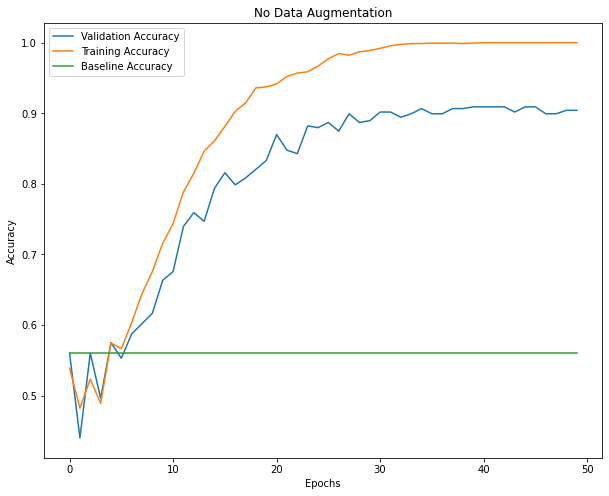

In [256]:
plt.figure(figsize = (10,8))
plt.plot(history_no_augs.history['val_acc'],label = "Validation Accuracy")
plt.plot(history_no_augs.history['acc'],label = "Training Accuracy")
plt.plot(np.arange(len(history_no_augs.history['acc'])),
         len(history_no_augs.history['acc']) * [baseline],
        label = "Baseline Accuracy")
#plt.plot(history_no_augs.history['val_loss'],label = "Validation Loss")
#plt.plot(history_no_augs.history['loss'],label = "Training Loss")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('No Data Augmentation')

plt.savefig('./images/acc_plot_no_aug',dpi = 300)

In [209]:
1 - df['has_cnt'].mean()

0.5784554845056566